In [300]:
import pandas as pd
df = pd.read_csv('Dataset/job_postings.csv')
df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [301]:
#drop salary columns and import them after from salaries.csv
df = df.drop(['max_salary', 'med_salary', 'min_salary'], axis=1)

In [302]:
df['job_id'].is_unique #we have a all unique job_id

True

In [303]:
job_industries = pd.read_csv('Dataset/job_details/job_industries.csv')
job_industries.head()

,job_id,industry_id
0,3378133231,68
1,3497509795,96
2,3690843087,47
3,3691775263,112
4,3691779379,80


In [304]:
job_industries['job_id'].count()

44091

In [305]:
job_industries['job_id'].is_unique #not unique so we need to group by 

False

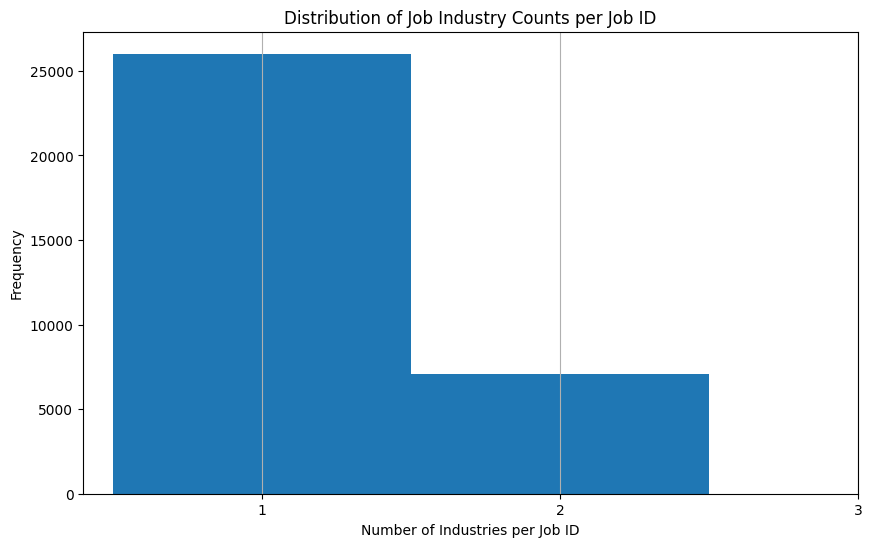

In [306]:
import matplotlib.pyplot as plt

job_id_counts = job_industries['job_id'].value_counts()
# Plot a histogram of the job_id counts
plt.figure(figsize=(10, 6))
job_id_counts.hist(bins=range(1, job_id_counts.max() + 1), align='left')
plt.title('Distribution of Job Industry Counts per Job ID')
plt.xlabel('Number of Industries per Job ID')
plt.ylabel('Frequency')
plt.xticks(range(1, job_id_counts.max() + 1))
plt.grid(axis='y')
plt.show()

In [307]:
industries = pd.read_csv('Dataset/maps/industries.csv')
industries.head()

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [308]:
industries['industry_id'].is_unique

True

In [309]:
job_industries['job_id'].count()

44091

In [310]:
job_industries = pd.merge(job_industries, industries, on ='industry_id', how='left')
job_industries = job_industries.drop(['industry_id'], axis=1)
job_industries.head()

,job_id,industry_name
0,3378133231,Higher Education
1,3497509795,IT Services and IT Consulting
2,3690843087,Accounting
3,3691775263,"Appliances, Electrical, and Electronics Manufa..."
4,3691779379,Advertising Services


In [311]:
job_industries['job_id'].is_unique

False

In [312]:
job_industries['job_id'].count()

44091

In [313]:
job_industries_grouped = job_industries.groupby('job_id')['industry_name'].apply(lambda x: ' | '.join(map(str, x))).reset_index()
job_industries_grouped.head()

,job_id,industry_name
0,3958427,Personal Care Product Manufacturing
1,85008768,Insurance
2,102339515,Consumer Services
3,108965123,Retail Apparel and Fashion
4,133114754,Truck Transportation


In [314]:
job_industries_grouped['job_id'].count()

33090

In [315]:
#validate the correctness of the list for multiple industries
print("JOB INDUSTRIES")
print(job_industries_grouped.iloc[33085]['industry_name'])

JOB INDUSTRIES
Retail | Manufacturing | Technology, Information and Internet


In [316]:
df['job_id'].count()

33246

In [317]:
df = pd.merge(df, job_industries_grouped, on ='job_id', how='left')
df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,industry_name
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,...,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,Medical Equipment Manufacturing
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,...,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,...,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,Automation Machinery Manufacturing
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,...,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,Non-profit Organizations
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,...,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,"Retail | Manufacturing | Technology, Informati..."


In [318]:
df['job_id'].count() #the count is the same as the df

33246

In [319]:
job_skills = pd.read_csv('Dataset/job_details/job_skills.csv')
job_skills.head()

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


In [320]:
skills = pd.read_csv('Dataset/maps/skills.csv')
skills.head()

,skill_abr,skill_name
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning


In [321]:
job_skills['job_id'].is_unique

False

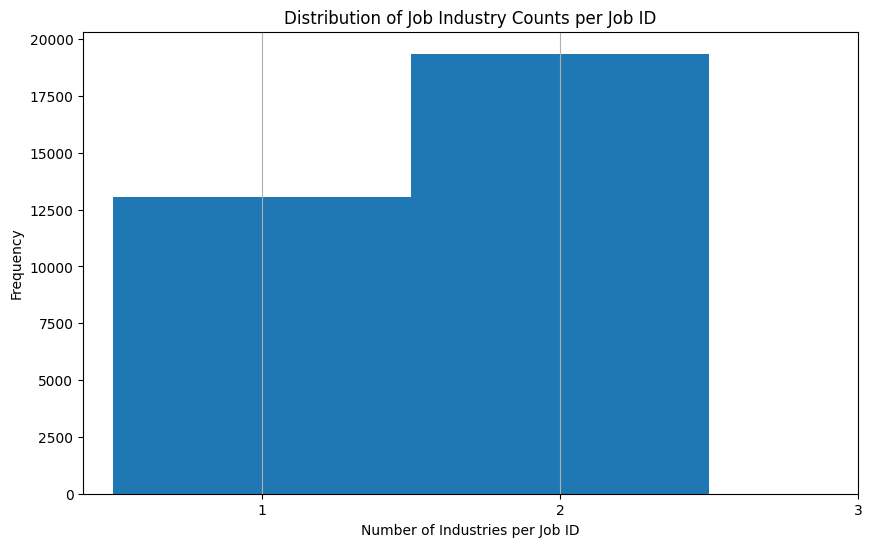

In [322]:
#job id is not unique 
job_id_counts = job_skills['job_id'].value_counts()
# Plot a histogram of the job_id counts
plt.figure(figsize=(10, 6))
job_id_counts.hist(bins=range(1, job_id_counts.max() + 1), align='left')
plt.title('Distribution of Job Industry Counts per Job ID')
plt.xlabel('Number of Industries per Job ID')
plt.ylabel('Frequency')
plt.xticks(range(1, job_id_counts.max() + 1))
plt.grid(axis='y')
plt.show()

In [323]:
job_skills = pd.merge(job_skills, skills, on ='skill_abr', how='left')
#job_skills = job_skills.drop(['skill_abr'], axis=1)
job_skills.head()

,job_id,skill_abr,skill_name
0,3690843087,ACCT,Accounting/Auditing
1,3690843087,FIN,Finance
2,3691763971,MGMT,Management
3,3691763971,MNFC,Manufacturing
4,3691775263,MGMT,Management


In [324]:
job_skills_grouped = job_skills.groupby('job_id')['skill_name'].apply(lambda x: ' | '.join(x)).reset_index()
job_skills_grouped.head()

,job_id,skill_name
0,3958427,Design | Art/Creative | Information Technology
1,85008768,Sales | Business Development
2,102339515,Business Development | Sales
3,108965123,Administrative
4,133114754,Sales | Business Development


In [325]:
job_skills_grouped.iloc[0]['skill_name']

'Design | Art/Creative | Information Technology'

In [326]:
df = pd.merge(df, job_skills_grouped, on ='job_id', how='left')
df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,industry_name,skill_name
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,...,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,Medical Equipment Manufacturing,Other
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,...,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,Industrial Machinery Manufacturing,Management | Manufacturing
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,...,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,Automation Machinery Manufacturing,Engineering
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,...,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,Non-profit Organizations,Management | Manufacturing
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,...,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,"Retail | Manufacturing | Technology, Informati...",Information Technology


In [327]:
benefits = pd.read_csv('Dataset/job_details/benefits.csv')
benefits.rename(columns={'inferred': 'benefit_inferred', 'type': 'benefit_type'}, inplace=True)
benefits.head()

,job_id,benefit_inferred,benefit_type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance


In [328]:
benefits['job_id'].is_unique #not unique

False

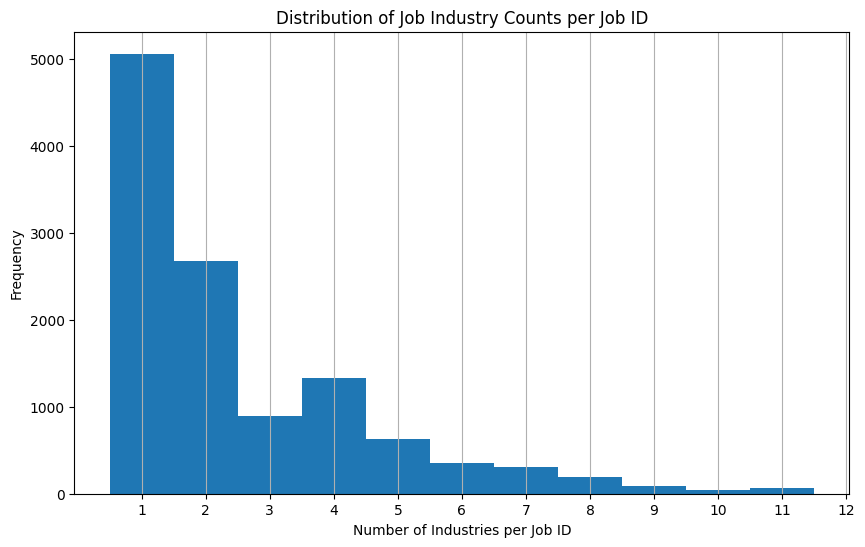

In [329]:
#job id is not unique 
job_id_counts = benefits['job_id'].value_counts()
# Plot a histogram of the job_id counts
plt.figure(figsize=(10, 6))
job_id_counts.hist(bins=range(1, job_id_counts.max() + 1), align='left')
plt.title('Distribution of Job Industry Counts per Job ID')
plt.xlabel('Number of Industries per Job ID')
plt.ylabel('Frequency')
plt.xticks(range(1, job_id_counts.max() + 1))
plt.grid(axis='y')
plt.show()

In [330]:
benefits_infered_df = benefits[['job_id', 'benefit_inferred']]
benefits_infered_df.head()

,job_id,benefit_inferred
0,3690843087,0
1,3690843087,0
2,3690843087,0
3,3690843087,0
4,3690843087,0


In [331]:
benefits_infered_df_grouped = benefits_infered_df.groupby('job_id')['benefit_inferred'].apply(lambda x: ' | '.join(map(str, x))).reset_index()
benefits_infered_df_grouped.head()

,job_id,benefit_inferred
0,3958427,0
1,85008768,0 | 0 | 0 | 0 | 0 | 0
2,133114754,0 | 0 | 0
3,529257371,1 | 1 | 1
4,967848246,1


In [332]:
benefits_type_df = benefits[['job_id', 'benefit_type']]
benefits_type_df.head()

,job_id,benefit_type
0,3690843087,Medical insurance
1,3690843087,Dental insurance
2,3690843087,401(k)
3,3690843087,Paid maternity leave
4,3690843087,Disability insurance


In [333]:
benefits_type_df_grouped = benefits_type_df.groupby('job_id')['benefit_type'].apply(lambda x: ' | '.join(x)).reset_index()
benefits_type_df_grouped.head()

,job_id,benefit_type
0,3958427,Medical insurance
1,85008768,Medical insurance | Vision insurance | Dental ...
2,133114754,Medical insurance | 401(k) | Vision insurance
3,529257371,Medical insurance | Vision insurance | Dental ...
4,967848246,401(k)


In [334]:
benefits_infered_df_grouped['job_id'].count()

11647

In [335]:
benefits_grouped = pd.merge(benefits_infered_df_grouped, benefits_type_df_grouped, on ='job_id', how='left')
benefits_grouped.head()

,job_id,benefit_inferred,benefit_type
0,3958427,0,Medical insurance
1,85008768,0 | 0 | 0 | 0 | 0 | 0,Medical insurance | Vision insurance | Dental ...
2,133114754,0 | 0 | 0,Medical insurance | 401(k) | Vision insurance
3,529257371,1 | 1 | 1,Medical insurance | Vision insurance | Dental ...
4,967848246,1,401(k)


In [336]:
benefits_grouped['job_id'].count()

11647

In [337]:
benefits_grouped['job_id'].is_unique

True

In [338]:
df = pd.merge(df, benefits_grouped, on ='job_id', how='left')
df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,...,posting_domain,sponsored,work_type,currency,compensation_type,scraped,industry_name,skill_name,benefit_inferred,benefit_type
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,...,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,Medical Equipment Manufacturing,Other,1 | 1,Medical insurance | Disability insurance
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,...,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,Industrial Machinery Manufacturing,Management | Manufacturing,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,...,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,Automation Machinery Manufacturing,Engineering,NaN,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,...,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,Non-profit Organizations,Management | Manufacturing,NaN,NaN
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,...,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,"Retail | Manufacturing | Technology, Informati...",Information Technology,NaN,NaN


In [339]:
df['job_id'].count()

33246

In [340]:
salaries = pd.read_csv('Dataset/job_details/salaries.csv')
salaries = salaries.drop(['salary_id'], axis=1)
salaries.rename(columns={'pay_period': 'salary_pay_period', 'currency': 'salary_currency', 'compensation_type': 'salary_compensation_type'}, inplace=True)
salaries.head()

,job_id,max_salary,med_salary,min_salary,salary_pay_period,salary_currency,salary_compensation_type
0,3378133231,30.0,NaN,22.0,HOURLY,USD,BASE_SALARY
1,3690843087,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
2,3691794313,22.0,NaN,19.0,HOURLY,USD,BASE_SALARY
3,3691795389,70000.0,NaN,68000.0,YEARLY,USD,BASE_SALARY
4,3691797089,22.0,NaN,18.0,HOURLY,USD,BASE_SALARY


In [341]:
salaries['job_id'].is_unique #unique

True

In [342]:
df = pd.merge(df, salaries, on ='job_id', how='left')
df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,...,industry_name,skill_name,benefit_inferred,benefit_type,max_salary,med_salary,min_salary,salary_pay_period,salary_currency,salary_compensation_type
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,...,Medical Equipment Manufacturing,Other,1 | 1,Medical insurance | Disability insurance,NaN,5250.00,NaN,MONTHLY,USD,BASE_SALARY
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,...,Industrial Machinery Manufacturing,Management | Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,...,Automation Machinery Manufacturing,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,...,Non-profit Organizations,Management | Manufacturing,NaN,NaN,NaN,22.27,NaN,HOURLY,USD,BASE_SALARY
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,...,"Retail | Manufacturing | Technology, Informati...",Information Technology,NaN,NaN,275834.0,NaN,205956.0,YEARLY,USD,BASE_SALARY


In [343]:
df['job_id'].count()

33246

In [344]:
companies = pd.read_csv('Dataset/company_details/companies.csv')
companies = companies.drop(['description', 'city', 'zip_code', 'address', 'url'], axis=1)
companies.rename(columns={'name': 'company_name', 'state': 'company_state', 'country': 'company_country'}, inplace=True)
companies.head()

,company_id,company_name,company_size,company_state,company_country
0,1009,IBM,7.0,NY,US
1,1016,GE HealthCare,7.0,0,US
2,1021,GE Power,7.0,NY,US
3,1025,Hewlett Packard Enterprise,7.0,Texas,US
4,1028,Oracle,7.0,Texas,US


In [345]:
companies['company_id'].is_unique #unique

True

In [346]:
company_industries = pd.read_csv('Dataset/company_details/company_industries.csv')
company_industries.rename(columns={'industry': 'company_industry'}, inplace=True)
company_industries.head()

,company_id,company_industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising


In [347]:
company_industries['company_id'].is_unique #not unique

False

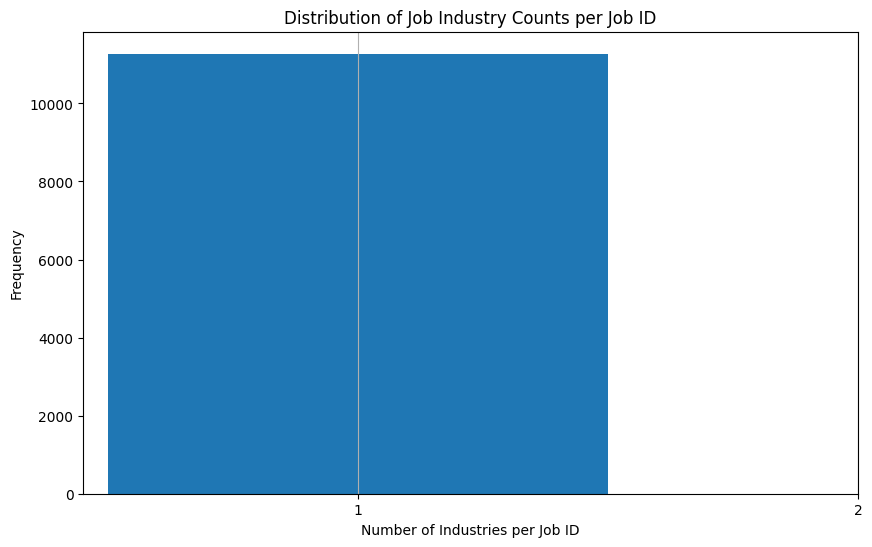

In [348]:
#job id is not unique 
company_id_counts = company_industries['company_id'].value_counts()
# Plot a histogram of the job_id counts
plt.figure(figsize=(10, 6))
company_id_counts.hist(bins=range(1, company_id_counts.max() + 1), align='left')
plt.title('Distribution of Job Industry Counts per Job ID')
plt.xlabel('Number of Industries per Job ID')
plt.ylabel('Frequency')
plt.xticks(range(1, company_id_counts.max() + 1))
plt.grid(axis='y')
plt.show()

In [349]:
company_industries_grouped = company_industries.groupby('company_id')['company_industry'].apply(lambda x: ' | '.join(x)).reset_index()
company_industries_grouped.head()

,company_id,company_industry
0,1009,Information Technology & Services | IT Service...
1,1016,Hospital & Health Care | Hospitals and Health ...
2,1021,Renewables & Environment | Renewable Energy Se...
3,1025,Information Technology & Services | IT Service...
4,1028,Information Technology & Services | IT Service...


In [350]:
companies['company_id'].count()

11361

In [351]:
companies = pd.merge(companies, company_industries_grouped, on ='company_id', how='left')
companies.head()

,company_id,company_name,company_size,company_state,company_country,company_industry
0,1009,IBM,7.0,NY,US,Information Technology & Services | IT Service...
1,1016,GE HealthCare,7.0,0,US,Hospital & Health Care | Hospitals and Health ...
2,1021,GE Power,7.0,NY,US,Renewables & Environment | Renewable Energy Se...
3,1025,Hewlett Packard Enterprise,7.0,Texas,US,Information Technology & Services | IT Service...
4,1028,Oracle,7.0,Texas,US,Information Technology & Services | IT Service...


In [352]:
companies['company_id'].count()

11361

In [353]:
df = pd.merge(df, companies, on ='company_id', how='left')
df.head()

,job_id,company_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,...,med_salary,min_salary,salary_pay_period,salary_currency,salary_compensation_type,company_name,company_size,company_state,company_country,company_industry
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,...,5250.00,NaN,MONTHLY,USD,BASE_SALARY,HearingLife,5.0,New Jersey,US,Retail
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,"Metalcraft of Mayville, Inc.",4.0,WI,US,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,"U.S. Tsubaki Power Transmission, LLC",4.0,Illinois,US,Automation Machinery Manufacturing
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,...,22.27,NaN,HOURLY,USD,BASE_SALARY,Episcopal Communities & Services,4.0,California,US,Non-profit Organization Management | Non-profi...
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,...,NaN,205956.0,YEARLY,USD,BASE_SALARY,"iHerb, LLC",5.0,California,US,Retail


In [354]:
df = df.drop(['company_id'], axis=1)

In [355]:
df

,job_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,...,med_salary,min_salary,salary_pay_period,salary_currency,salary_compensation_type,company_name,company_size,company_state,company_country,company_industry
0,3757940104,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,9.0,...,5250.00,NaN,MONTHLY,USD,BASE_SALARY,HearingLife,5.0,New Jersey,US,Retail
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Metalcraft of Mayville, Inc.",4.0,WI,US,Industrial Machinery Manufacturing
2,3757938019,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"U.S. Tsubaki Power Transmission, LLC",4.0,Illinois,US,Automation Machinery Manufacturing
3,3757938018,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,1.0,...,22.27,NaN,HOURLY,USD,BASE_SALARY,Episcopal Communities & Services,4.0,California,US,Non-profit Organization Management | Non-profi...
4,3757937095,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,NaN,...,NaN,205956.0,YEARLY,USD,BASE_SALARY,"iHerb, LLC",5.0,California,US,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,Full-time,"Santa Clarita, CA",NaN,1.692830e+12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,CargoLogin.,1.0,California,US,Transportation/Trucking/Railroad
33242,108965123,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,Full-time,"New York, NY",2.0,1.699040e+12,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33243,102339515,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,Full-time,Greater Boston,NaN,1.699050e+12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,DryerVentz - DuctVentz,1.0,0,US,Consumer Services
33244,85008768,Licensed Insurance Agent,While many industries were hurt by the last fe...,YEARLY,Full-time,"Chico, CA",NaN,1.692750e+12,NaN,5.0,...,NaN,45760.0,YEARLY,USD,BASE_SALARY,NaN,NaN,NaN,NaN,NaN


In [356]:
df = df.drop(['job_posting_url', 'application_url', 'posting_domain'], axis=1)

In [357]:
df = df.fillna('') #for import
df

,job_id,title,description,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,...,med_salary,min_salary,salary_pay_period,salary_currency,salary_compensation_type,company_name,company_size,company_state,company_country,company_industry
0,3757940104,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,MONTHLY,Full-time,"Little River, SC",,1.699090e+12,,9.0,...,5250.0,,MONTHLY,USD,BASE_SALARY,HearingLife,5.0,New Jersey,US,Retail
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,,Full-time,"Beaver Dam, WI",,1.699080e+12,,,...,,,,,,"Metalcraft of Mayville, Inc.",4.0,WI,US,Industrial Machinery Manufacturing
2,3757938019,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,,Full-time,"Bessemer, AL",,1.699080e+12,,,...,,,,,,"U.S. Tsubaki Power Transmission, LLC",4.0,Illinois,US,Automation Machinery Manufacturing
3,3757938018,Cook,descriptionTitle\n\n Looking for a great oppor...,HOURLY,Full-time,"Aliso Viejo, CA",,1.699080e+12,,1.0,...,22.27,,HOURLY,USD,BASE_SALARY,Episcopal Communities & Services,4.0,California,US,Non-profit Organization Management | Non-profi...
4,3757937095,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,Full-time,United States,,1.698970e+12,1.0,,...,,205956.0,YEARLY,USD,BASE_SALARY,"iHerb, LLC",5.0,California,US,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,Sales Manager,Are you a dynamic and creative marketing profe...,,Full-time,"Santa Clarita, CA",,1.692830e+12,,,...,,,,,,CargoLogin.,1.0,California,US,Transportation/Trucking/Railroad
33242,108965123,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",,Full-time,"New York, NY",2.0,1.699040e+12,,4.0,...,,,,,,,,,,
33243,102339515,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,,Full-time,Greater Boston,,1.699050e+12,,,...,,,,,,DryerVentz - DuctVentz,1.0,0,US,Consumer Services
33244,85008768,Licensed Insurance Agent,While many industries were hurt by the last fe...,YEARLY,Full-time,"Chico, CA",,1.692750e+12,,5.0,...,,45760.0,YEARLY,USD,BASE_SALARY,,,,,


In [358]:
# Convert from milliseconds to seconds (and from float to int)
df['listed_time'] = (df['listed_time'] / 1000).astype('int64')
df['expiry'] = (df['expiry'] / 1000).astype('int64')
df['original_listed_time'] = (df['original_listed_time'] / 1000).astype('int64')
#df['closed_time'] = (df['closed_time'] / 1000).astype('int64')

# Convert the Unix timestamp to UTC datetime
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='s', utc=True)
df['expiry'] = pd.to_datetime(df['expiry'], unit='s', utc=True)
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='s', utc=True)
#df['closed_time'] = pd.to_datetime(df['closed_time'], unit='s', utc=True)

df['scraped'] = pd.to_datetime(df['scraped'], unit='s', utc=True)
 
# close_time is not used given that is not convertible to datetime
df = df.drop(['closed_time'], axis=1)

In [359]:
df.to_csv('dataset_jobs.csv', sep=',', index=False, header=True, encoding='utf-8')

In [360]:
def fix_line_terminators(file_path, output_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Replace LS (\u2028) and PS (\u2029) with the standard newline character
    fixed_content = content.replace('\u2028', '\n').replace('\u2029', '\n')

    with open(output_path, 'w', encoding='utf-8') as file:
        file.write(fixed_content)

# Replace with the path to your CSV file
file_path = 'dataset_jobs.csv'
output_path = 'dataset_jobs.csv'
fix_line_terminators(file_path, output_path)